In [1]:
from utility_bffitter import *
from utility_dfplotter import *
from utility_dfcounter import *

# 1.Fit the Counts

In [2]:
fitter = Fitter()
fitter.fit()
sigma, corr = fitter.paramSigma()

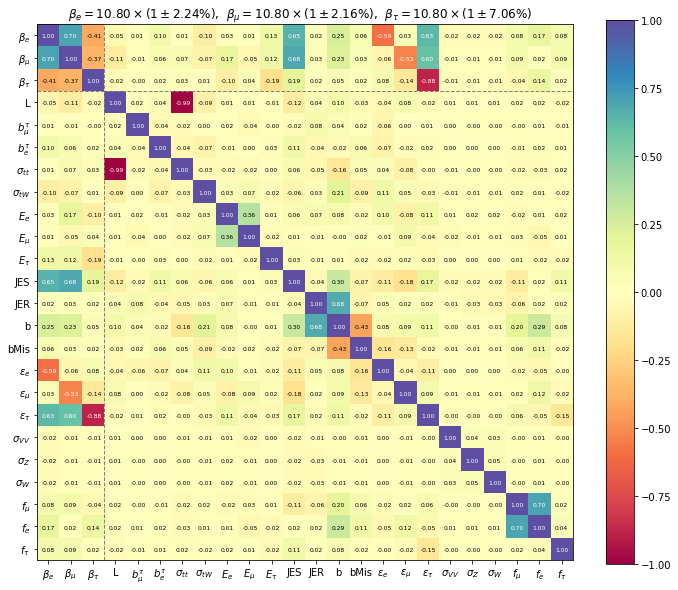

In [7]:
# make plots
lablesName = [r'$\beta_e$',r'$\beta_\mu$',r'$\beta_\tau$',
              "L",r"$b^\tau_\mu$",r"$b^\tau_e$",
              r"$\sigma_{tt}$",r"$\sigma_{tW}$",
              r"$E_e$",r"$E_\mu$",r"$E_\tau$",
              "JES","JER","b","bMis",
              r"$\epsilon_e$",r"$\epsilon_\mu$",r"$\epsilon_\tau$",
              r"$\sigma_{VV}$",r"$\sigma_{Z}$",r"$\sigma_{W}$",
              r"$f_{\mu}$",r"$f_{e}$",r"$f_{\tau}$",
              ]

lablesPos = np.arange(0,len(lablesName),1)  

plt.figure(figsize=(12,10),facecolor='w')
plt.imshow(corr,cmap='Spectral',vmax=1,vmin=-1)
plt.xticks(lablesPos,lablesName)
plt.yticks(lablesPos,lablesName)
for i in lablesPos:
    for j in lablesPos:
        value = corr[i,j]
        if abs(value)>0.5:
            fcolor = 'w'
        else:
            fcolor = 'k'
            
        plt.text(i-0.3,j+0.1,'{:4.2f}'.format(corr[i,j]),fontsize=6,color=fcolor )
plt.colorbar()
plt.axvline(2.5,color='grey',linewidth=1,linestyle='--')
plt.axhline(2.5,color='grey',linewidth=1,linestyle='--')

plt.title(r'$\beta_e   =10.80\times(1\pm${:4.2f}%),  '.format(sigma[0]/0.1080*100) + 
          r'$\beta_\mu =10.80\times(1\pm${:4.2f}%),  '.format(sigma[1]/0.1080*100) + 
          r'$\beta_\tau=10.80\times(1\pm${:4.2f}%)   '.format(sigma[2]/0.1080*100),
          fontsize=12
         )
plt.savefig('../plots/combine/covarMatrix_theta_yield.png',dpi=300)

In [4]:
# print out paramters
for i in range(sigma.size):
    l = lablesName[i]
    mean = fitter.paramML[i]
    std = sigma[i]
    if i <3:
        mean = 10.80
        std *=100
    print('{:15}:  {:6.3f} +/-{:6.3f}'.format(l,mean,std))

$\beta_e$      :  10.800 +/- 0.242
$\beta_\mu$    :  10.800 +/- 0.233
$\beta_\tau$   :  10.800 +/- 0.763
L              :  -0.079 +/- 0.560
$b^\tau_\mu$   :  -0.000 +/- 0.962
$b^\tau_e$     :   0.014 +/- 0.984
$\sigma_{tt}$  :   0.125 +/- 0.718
$\sigma_{tW}$  :  -0.199 +/- 1.036
$E_e$          :  -0.118 +/- 0.677
$E_\mu$        :  -0.052 +/- 0.969
$E_\tau$       :   0.040 +/- 0.994
JES            :  -0.519 +/- 0.715
JER            :   0.177 +/- 0.973
b              :   0.029 +/- 0.054
bMis           :  -1.498 +/- 0.980
$\epsilon_e$   :  -0.610 +/- 0.984
$\epsilon_\mu$ :  -0.352 +/- 0.954
$\epsilon_\tau$:   0.142 +/- 0.899
$\sigma_{VV}$  :  -0.127 +/- 1.018
$\sigma_{Z}$   :  -0.127 +/- 1.019
$\sigma_{W}$   :  -0.127 +/- 1.019
$f_{\mu}$      :   1.957 +/- 0.818
$f_{e}$        :  -0.173 +/- 0.573
$f_{\tau}$     :   0.095 +/- 0.951


# 2. Plot Histogram

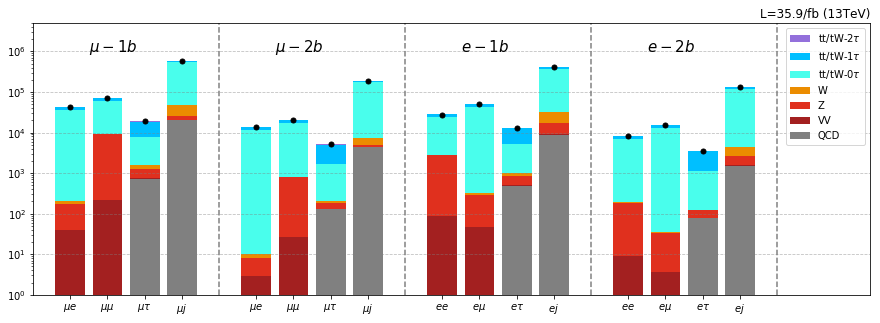

In [3]:
plotCountsSummary ( fitter.count0)
plt.savefig('../plots/summary_yields.png',dpi=300)